# **PROGRAM 1 : TRAINING A NEURAL NETWORK**

In [ ]:
import tensorflow as tf
import numpy as np  # data as lists
from tensorflow import keras # neural network as a set of sequential layers

In [ ]:
# neural network created with one layer, that layer has one neuron, and the input shape to it is only one value.
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])  

In [ ]:
# loss function measures the guessed answers against the known correct answers and measures how well or badly it did.
# use mean_squared_error for the loss 
# based on the loss function's result, optimizer tries to minimize the loss.
# use stochastic gradient descent (sgd) for the optimizer
model.compile(optimizer='sgd', loss='mean_squared_error')  

In [ ]:
# data provided
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

In [ ]:
# train the neural network
# The process of training the neural network, where it learns the relationship between the X‘s and Y‘s, is in the model.fit call
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 221ms/step - loss: 53.1516
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 41.8175
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 32.9003
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 25.8848
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 20.3652
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 16.0227
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 12.6062
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 9.9183
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 7.8036
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 6.1398
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 4.8308
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 3.8010
Epoch 13/500
1/1 [==============================] - 

In [ ]:
# use the model.predict method to have it figure out the Y for a previously unknown X [Y=3X+1]
print(model.predict([10.0]))

[[31.000727]]


# **PROGRAM 2 : CREATING A COMPUTER VISION MODEL**

In [ ]:
# train a neural network to recognize items of clothing from a common dataset called Fashion MNIST. It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 grayscale image
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
# The Fashion MNIST data is available in the tf.keras.datasets API
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
# Calling load_data on that object gives you two sets of two lists: training values and testing values, which represent graphics that show clothing items and their labels.
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

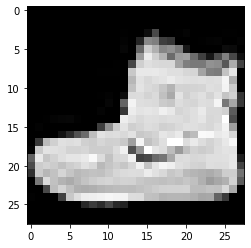

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [ ]:
# all the values are integers between 0 and 255
# normalize the data
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
# design teh model having 3 layers
# Sequential defines a sequence of layers in the neural network.
# Flatten takes a square and turns it into a one-dimensional vector.
# Dense adds a layer of neurons.
# Activation functions tell each layer of neurons what to do
# Relu effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network
# Softmax takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0]
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128, activation=tf.nn.relu),tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
# use of metrics= as a parameter, which allows TensorFlow to report on the accuracy of the training by checking the predicted results against the known answers (the labels)
model.compile(optimizer = tf.keras.optimizers.Adam(),loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6308 - accuracy: 0.7779
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3836 - accuracy: 0.8611
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3450 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3215 - accuracy: 0.8820
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.8899


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 967us/step - loss: 0.3529 - accuracy: 0.8741


[0.3528640568256378, 0.8741000294685364]

In [ ]:
# The output of the model is a list of 10 numbers. Those numbers are a probability that the value being classified is the corresponding label. For example, the first value in the list is the probability that the clothing is of class 0 and the next is a 1. 
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[7.0956676e-06 2.4519667e-07 1.7762217e-07 7.6966531e-09 3.7958878e-07
 5.1582418e-04 3.8223044e-07 5.7546131e-02 4.1202522e-05 9.4188851e-01]
9


To stop the training when reached a desired value say 95% accuracy

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5933 - accuracy: 0.7906
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3701 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3149 - accuracy: 0.8822
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2958 - accuracy: 0.8911
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2778 - accuracy: 0.8983


# **PROGRAM 3 : INTRODUCTION TO CONVOLUTIONS**

In [ ]:
# A convolution is a filter that passes over an image, processes it, and extracts the important features. [FEATURE MAPPING]
# You'll scan every pixel in the image and then look at its neighboring pixels. You multiply the values of those pixels by the equivalent weights in a filter.
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

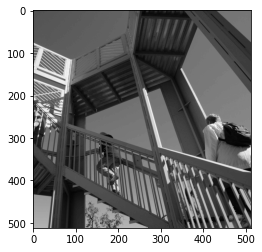

In [ ]:
import matplotlib.pyplot as plt
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.grid(False)
plt.gray()
#plt.axis('off')
plt.imshow(i)
plt.show()

In [ ]:
# The image is stored as a NumPy array, so we can create the transformed image by just copying that array. The size_x and size_y variables will hold the dimensions of the image so you can loop over it later.
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [ ]:
# Create convolution matrix or kernel as a 3 x 3 array
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]

# If all the digits in the filter don't add up to 0 or 1, you should probably do a weight
weight = 1

In [ ]:
# Iterate over the image, leaving a 1-pixel margin, and multiply each of the neighbors of the current pixel by the value defined in the filter.
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

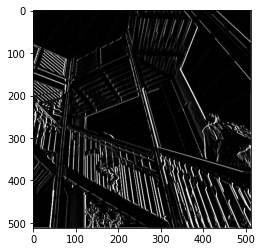

In [ ]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show() 

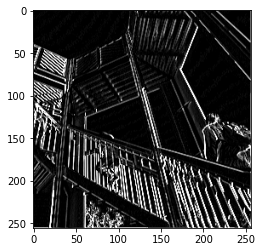

In [ ]:
# Pooling layers reduce the overall amount of information in an image while maintaining the features that are detected as present
# Iterate over the image and, at each point, consider the pixel and its immediate neighbors to the right, beneath, and right-beneath. Take the largest of those (hence max pooling) and load it into the new image. Thus, the new image will be one-fourth the size of the old.
# (2, 2) pooling
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]
 
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

# **PROGRAM 4 : CNN TO ENHANCE COMPUTER VISION**

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128, activation='relu'),tf.keras.layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6291 - accuracy: 0.7815
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3763 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3360 - accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3111 - accuracy: 0.8843
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3430 - accuracy: 0.8740
Test loss: 0.3430418372154236, Test accuracy: 87.40000128746033


In [ ]:
# convolutional layers added 
# Overfitting might occur when the network learns the data from the training set too well, so it's specialised to recognize only that data, and as a result is less effective at seeing other data in more general situations

import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Gather the data

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),tf.keras.layers.MaxPooling2D(2, 2),tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),tf.keras.layers.MaxPooling2D(2,2),tf.keras.layers.Flatten(),tf.keras.layers.Dense(128, activation='relu'),tf.keras.layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

2.4.1
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_21 (Dense)             (None, 10)        

KeyboardInterrupt: ignored

In [ ]:
# the ones at index 0, index 23 and index 28 are all the same value (9)
print(test_labels[:100])

In [ ]:
# in the following code, FIRST_IMAGE, SECOND_IMAGE and THIRD_IMAGE are all the indexes for value 9, an ankle boot.
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# **PROGRAM 5 : CNN TO IDENTIFY FEATURES IN A COMPLEX IMAGE WHERE THE SUBJECT CAN BE ANYWHERE**

In [ ]:
# building a horses-or-humans classifier that will tell you if a given image contains a horse or a human, where the network is trained to recognize features that determine which is which
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip

In [ ]:
import os
import zipfile
 
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [ ]:
# ImageDataGenerator reads images from subdirectories and automatically labels them from the name of that subdirectory

# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
 
# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

In [ ]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
 
# Index for iterating over images
pic_index = 0

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
 
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.summary()

In [ ]:
# Train your model with the binary_crossentropy loss because it's a binary classification problem 
# In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD) because RMSprop automates learning-rate tuning for you
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
# preprocess your images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
 
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

In [ ]:
# Training
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

In [ ]:
# Visualize intermediate representations
# Pick a random image from the training set, then generate a figure where each row is the output of a layer and each image in the row is a specific filter in that output feature map. Rerun that cell to generate intermediate representations for a variety of training images.

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
 
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
 
img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
 
# Rescale by 1/255
x /= 255
 
# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
 
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
 
# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      if x.std()>0:
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# **PROGRAM 6 : CNN WITH LARGE DATASET**

In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [ ]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset 
# Note: This is a very large dataset and will take time to download
!wget --no-check-certificate "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" -O "/tmp/cats-and-dogs.zip"
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/'))) 
# Expected Output:
# 12501
# 12501

--2021-02-19 10:52:22--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.74.54.169, 2600:1409:8800:188::e59, 2600:1409:8800:180::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.74.54.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   147MB/s    in 5.7s    

2021-02-19 10:52:28 (139 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]

12501
12501


In [ ]:
# unzip data into training and testing directories

try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
 
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]
 
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
 
    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)
 
 
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"
 
split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)
# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [ ]:
# to check if your data is properly unpacked

print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))
# Expected output:
# 11250
# 11250
# 1250
# 1250

11250
11250
1250
1250


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() 
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 18496)           

In [ ]:
# train the model using an ImageDataGenerator

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
 
VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))
 
# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
174/225 [======================>.......] - ETA: 1:38 - loss: 0.8939 - accuracy: 0.5788

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

225/225 [==============================] - 451s 2s/step - loss: 0.8426 - accuracy: 0.5934 - val_loss: 0.5121 - val_accuracy: 0.7703
Epoch 2/15
225/225 [==============================] - 451s 2s/step - loss: 0.5010 - accuracy: 0.7566 - val_loss: 0.4287 - val_accuracy: 0.7975
Epoch 3/15
225/225 [==============================] - 450s 2s/step - loss: 0.4304 - accuracy: 0.8011 - val_loss: 0.3726 - val_accuracy: 0.8435
Epoch 4/15
225/225 [==============================] - 445s 2s/step - loss: 0.3712 - accuracy: 0.8331 - val_loss: 0.3644 - val_accuracy: 0.8275
Epoch 5/15
225/225 [==============================] - 446s 2s/step - loss: 0.3056 - accuracy: 0.8647 - val_loss: 0.2759 - val_accuracy: 0.8888
Epoch 6/15
225/225 [==============================] - 445s 2s/step - loss: 0.2429 - accuracy: 0.8978 - val_loss: 0.2091 - val_accuracy: 0.9200
Epoch 7/15
225/225 [==============================] - 447s 2s/step - loss: 0.1803 - accuracy: 0.9289 - val_loss: 0.1301 - val_accuracy: 0.9480
Epoch 8/15

<Figure size 432x288 with 0 Axes>

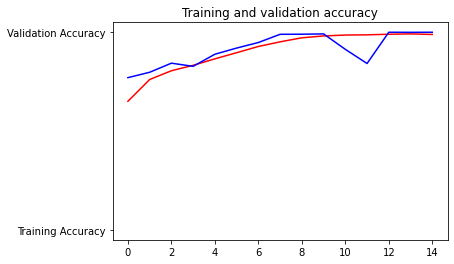

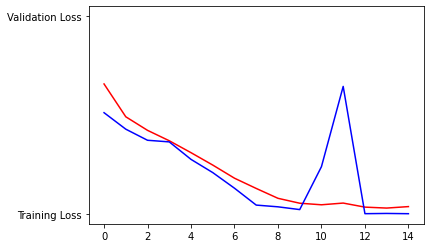

<Figure size 432x288 with 0 Axes>

In [ ]:
# explore and plot the training and validation accuracy

%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
 
epochs=range(len(acc)) # Get number of epochs
 
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()
 
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")